# Ex1 Use data from Danmarks Statistik - Databanken

1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'

3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 

4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

# 5. With data aggregation and data visualization answer the following questions:

1. What is the change in pct of divorced danes from 2008 to 2020?

In [2]:
import pandas as pd

divorced_danes = pd.read_csv("./DivorcedDanes.csv", sep=";")
print(divorced_danes)

divorced_people_2008 = divorced_danes.iloc[0,2]
divorced_people_2020 = divorced_danes.iloc[1,2]

divorced_people_change = (divorced_people_2020 - divorced_people_2008) / divorced_people_2008 * 100

print()
print("Antallet af skilte mennesker i Danmark er steget med " + str(divorced_people_change) + "% fra 2008K1 til 2020K3")

  CIVILSTAND     TID  INDHOLD
0   Fraskilt  2008K1   428864
1   Fraskilt  2020K3   550715

Antallet af skilte mennesker i Danmark er steget med 28.412503730786447% fra 2008K1 til 2020K3


2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [ ]:
all_danes = pd.read_csv("./AllPeople.csv", sep=";")

copenhagen_data = all_danes[(all_danes['OMRÅDE'] == 'København')]

copenhagen_data_unmarried = all_danes[(all_danes['CIVILSTAND'] == 'Ugift') & (all_danes['OMRÅDE'] == 'København')]
copenhagen_data.head()

never_married_percentage = (int(copenhagen_data_unmarried['INDHOLD']) / int(copenhagen_data['INDHOLD'])) * 100
print(never_married_percentage)

3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

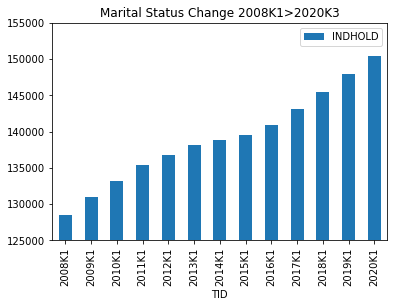

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

marital_status_change = pd.read_csv("./MaritalStatusChange.csv", sep=";")

marital_status_change.plot(kind="bar", title='Marital Status Change 2008K1>2020K3', x='TID', y='INDHOLD')
plt.ylim(125000,155000)
plt.show()

4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

(0.0, 100.0)

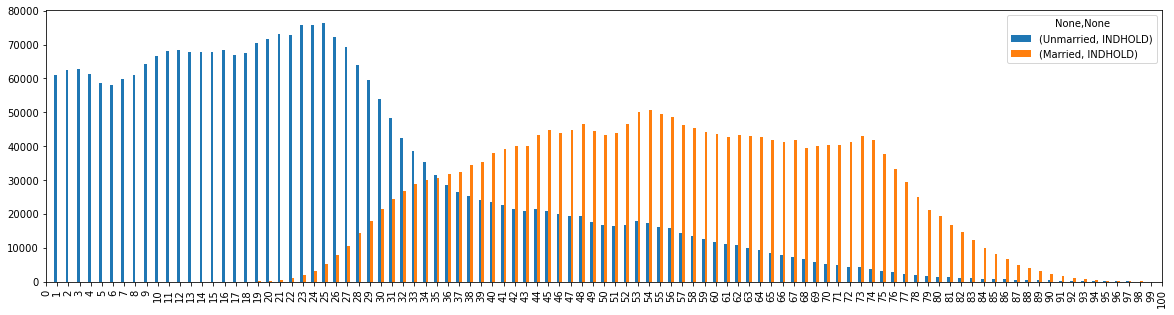

In [71]:
%matplotlib inline

married_vs_unmarried = pd.read_csv("./MarriedVersusUnmarried.csv", sep=";")
married_vs_unmarried = married_vs_unmarried[(married_vs_unmarried['ALDER'] != 'I alt')]

married = married_vs_unmarried[(married_vs_unmarried['CIVILSTAND'] == 'Gift/separeret')].reset_index(drop=True)
not_married = married_vs_unmarried[(married_vs_unmarried['CIVILSTAND'] == 'Ugift')].reset_index(drop=True)
romantic_status = pd.concat([not_married, married], axis=1, keys=['Unmarried','Married'])

romantic_status.plot(kind="bar", figsize=(20,5))
plt.xlim(0,100)